In [1]:
import os 
import sys

sys.path.insert(0, 'icenumerics/')

import icenumerics as ice
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

ureg = ice.ureg
idx = pd.IndexSlice

import warnings
warnings.filterwarnings("error")


%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 150

In [3]:
import magcolloids as mgc

In [5]:
load_obj = mgc.trj_lazyread(r"FullyDegeneracy_Type3_l10_exp1.lammpstrj", output = ["x","y","z","mux","muy","muz"])

In [7]:
bnd = load_obj.get_bounds(slice(0,None,20))

trj = load_obj.read_trj(slice(0,None,20))

In [9]:
trj

type             x         y    z           mux        muy  \
frame  id                                                                
0      1       1  9.293780e-16   31.6779  0.0  0.000000e+00   0.000000   
       2       1  3.300000e+01    1.3221  0.0  0.000000e+00   0.000000   
       3       1  6.600000e+01   31.6779  0.0  0.000000e+00   0.000000   
       4       1  9.900000e+01    1.3221  0.0  0.000000e+00   0.000000   
       5       1  1.320000e+02   31.6779  0.0  0.000000e+00   0.000000   
...          ...           ...       ...  ...           ...        ...   
200000 396     4  1.650000e+02  313.5000  0.0  1.858760e-15  30.355801   
       397     4  1.980000e+02  313.5000  0.0  0.000000e+00 -30.355801   
       398     4  2.310000e+02  313.5000  0.0  1.858760e-15  30.355801   
       399     4  2.640000e+02  313.5000  0.0  0.000000e+00 -30.355801   
       400     4  2.970000e+02  313.5000  0.0  1.858760e-15  30.355801   

                 muz  
frame  id             
0      1    0.000053  
       2    0.000053  
       3    0.000053  
       4    0.000053  
       5    0.000053  
...              ...  
200000 396  0.000000  
       397  0.000000  
       398  0.000000  
       399  0.000000  
       400  0.000000  

[40400 rows x 7 columns]

In [10]:
import scipy.spatial as sptl

In [11]:
def match_particles_and_traps(lammpstrj):
    """ Ensures that the order of particles is the same as their corresponding traps. 
    
    Input
    lammpstrj is a trayectory as read by the magcolloids trj_lazyread method
    Output
    lammpstrj but with the indices permuted to make traps and particles coincide. 
    """
    
    frames = lammpstrj.index.get_level_values("frame").unique()
    frame = lammpstrj.loc[frames[0],:]
    
    particles = frame.query("type<=2")
    traps = frame.query("type>2")
    
    trap_tree = sptl.cKDTree(traps.loc[:,["x","y"]])
    neigh = trap_tree.query(particles.loc[:,["x","y"]],k=1)[1]
    N = len(particles)
    
    neigh_array = N+neigh+1

    def shift_trap_id(i):
        """ 
        if a trap has id 

        * N+neigh[i]+1
  
        it should now have id i+N+1
        """
    
        where = np.where(neigh_array==i)[0]
        if len(where)==0:
            return i
        else: 
            return where[0]+N+1
    new_ids = [shift_trap_id(i) for i in lammpstrj.index.get_level_values("id").unique()]
    lammpstrj.index = lammpstrj.index.set_levels(new_ids, level=1)
    
    return lammpstrj

In [12]:
trj = match_particles_and_traps(trj)

ValueError: Level values must be unique: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 292, 302, 294, 304, 305, 296, 298, 308, 300, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 392, 293, 394, 295, 396, 297, 398, 299, 400] on level 1

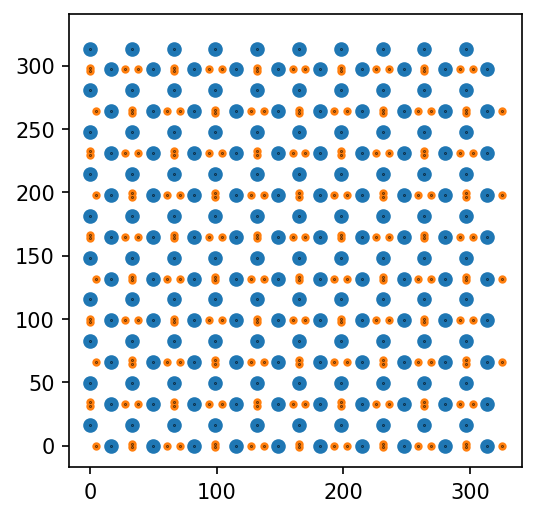

In [13]:
frame = trj.loc[0,:]

particles = frame.query("type<=2")
traps = frame.query("type>2")

plt.plot(traps.x,traps.y, 'o')
plt.plot(particles.x,particles.y, '.')

N = len(particles)

for i in range(N):
    
    plt.plot([frame.loc[N+i+1].x, frame.loc[i+1].x], 
             [frame.loc[N+i+1].y, frame.loc[i+1].y], '.', markersize = 0.5, color="k")
    
plt.axis("square");

In [14]:
def get_ice_trj(trj,bounds):
    """ Converts lammps trj to ice trj"""
    # in the trj dataframe, traps and atoms are labeled by different types
    traps = trj[trj.type>2].copy(deep=True)
    traps = traps.rename(columns = {"mux":"dx","muy":"dy","muz":"dz"})
    atoms = trj[trj.type<=2].copy(deep=True)
    atoms = unwrap_trj(atoms.filter(["x","y","z"]),bounds.loc[[0]])
    trj = []

    ## The traps id are ordered (thankfully) in the same order as the particles, but they start consecutively.
    # We keep this order but start at one.
    traps.loc[:,"id"] = traps.index.get_level_values("id").values
    traps.loc[:,"frame"] = traps.index.get_level_values("frame")
    traps.loc[:,"id"] = traps["id"]-min(traps["id"])+1
    traps = traps.set_index(["frame","id"])

    ## create a relative position vector. This goes from the center of the trap to the position of the particle
    colloids = atoms-traps
    colloids = colloids[["x","y","z"]]
    colloids.columns = ["cx","cy","cz"]
    traps = pd.concat([traps,colloids],axis=1)
    colloids = []
    atoms = []

    ## Flip those traps that are not pointing in the  direction of the colloids
    flip = np.sign((traps[["dx","dy","dz"]].values*traps[["cx","cy","cz"]].values).sum(axis=1))
    traps[["dx","dy","dz"]] = traps[["dx","dy","dz"]].values*flip[:,np.newaxis]

    ## make the direction vector unitary
    mag = np.sign((traps[["dx","dy","dz"]].values**2).sum(axis=1))
    traps[["dx","dy","dz"]] = traps[["dx","dy","dz"]].values*mag[:,np.newaxis]

    #timestep = 10e-3 #sec
    #traps["t"] = traps.index.get_level_values("frame")*timestep

    return traps

In [15]:
def unwrap_trj(trj,bounds):
    """ Unwraps trj around periodic boundaries"""
    trj2 = trj.copy(deep=True)

    def unwrap(p):
        p.iloc[:] = np.unwrap(p,axis=0)
        return p

    for c in trj.columns:
        trj2[c] = (trj2[c] - bounds[c+"_min"].values)/(bounds[c+"_max"].values - bounds[c+"_min"].values)

    trj2 = (trj2*2*np.pi).groupby("id").apply(unwrap)/(2*np.pi)

    for c in trj.columns:
        trj2[c] = trj2[c]*(bounds[c+"_max"].values - bounds[c+"_min"].values) + bounds[c+"_min"].values

    return trj2

In [16]:
col_trj = get_ice_trj(trj,bnd)
col_trj = col_trj.drop(columns=["type"])

In [17]:
col_trj

x      y    z            dx         dy   dz         cx  \
frame  id                                                                
0      1     16.5    0.0  0.0 -2.300000e+01   0.000000  0.0 -16.500000   
       2     49.5    0.0  0.0 -2.300000e+01  -0.000000 -0.0 -16.500000   
       3     82.5    0.0  0.0 -2.300000e+01   0.000000  0.0 -16.500000   
       4    115.5    0.0  0.0 -2.300000e+01  -0.000000 -0.0 -16.500000   
       5    148.5    0.0  0.0 -2.300000e+01   0.000000  0.0 -16.500000   
...           ...    ...  ...           ...        ...  ...        ...   
200000 196  165.0  313.5  0.0 -1.858760e-15 -30.355801 -0.0  12.302002   
       197  198.0  313.5  0.0  0.000000e+00 -30.355801  0.0  11.473007   
       198  231.0  313.5  0.0 -1.858760e-15 -30.355801 -0.0   4.699997   
       199  264.0  313.5  0.0  0.000000e+00 -30.355801  0.0  27.970001   
       200  297.0  313.5  0.0 -1.858760e-15 -30.355801 -0.0  21.561005   

                   cy   cz  
frame  id                   
0      1    31.677900  0.0  
       2     1.322100  0.0  
       3    31.677900  0.0  
       4     1.322100  0.0  
       5    31.677900  0.0  
...               ...  ...  
200000 196 -16.592987  0.0  
       197 -16.494995  0.0  
       198 -16.401001  0.0  
       199 -16.291992  0.0  
       200 -16.563995  0.0  

[20200 rows x 9 columns]

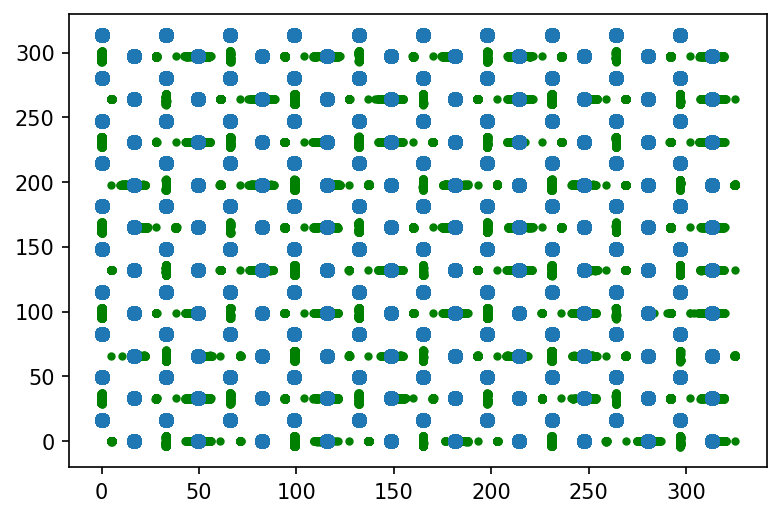

In [27]:
frame = col_trj.loc[0,:]


plt.plot(col_trj.cx+col_trj.x,col_trj.cy+col_trj.y, '.', color = 'green')
plt.plot(col_trj.x,col_trj.y, 'o')

In [16]:
def draw_frame(trj, frame_no = -1, region = None, radius = None, ax = None, sim = None, atom_type = 1, trap_type = 2, cutoff = None, trap_color = "blue", particle_color = "white"):

    if ax is None:
        ax = plt.gca()

    if sim is not None:
        units =  sim.traps.cutoff.units

        region = [r.to(units).magnitude for r in sim.world.region]
        radius = sim.particles.radius.to(units).magnitude
        atom_type = sim.particles.atom_type+1
        trap_type = sim.traps.atom_type+1
        cutoff = sim.traps.cutoff.to(units).magnitude
    
    if cutoff is None:
        cutoff = radius*1.1
        
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlim(region[0],region[1])
    ax.set_ylim(region[2],region[3])
    ax.set(aspect='equal')

    frames = trj.index.get_level_values("frame").unique()

    if "type" in trj.columns:
        atoms = trj[trj.type==atom_type]
        traps = trj[trj.type==trap_type]
    else:
        atoms = trj.loc[:,["x","y","z"]]+trj.loc[:,["cx","cy","cz"]].values
        try:
            trj = trj.drop(columns={"mux","muy","muz"})
        except:
            pass
        traps = trj.rename(columns = {"dx":"mux","dy":"muy","dz":"muz"})

    patches = []

    for i,t in traps.loc[idx[frames[frame_no],:],:].iterrows():

        c = plt.Circle(
            (t.x+t.mux/2,t.y+t.muy/2), cutoff ,color = trap_color)
        patches.append(c)
        c = plt.Circle(
            (t.x-t.mux/2,t.y-t.muy/2), cutoff,color = trap_color)
        patches.append(c)
        width = t.mux+2*np.abs(cutoff*(not np.abs(t.muy)<1e-10))
        height = t.muy+2*np.abs(cutoff*(not np.abs(t.mux)<1e-10))
        c = plt.Rectangle(
            (t.x-width/2,t.y-height/2),
            width = width, height = height,color = trap_color)
        patches.append(c)

    for i,a in atoms.loc[idx[frames[frame_no],:],:].iterrows():
        c = plt.Circle((a.x,a.y), radius, facecolor = particle_color, edgecolor = "black")
        patches.append(c)

    for p in patches:
        ax.add_patch(p)
    return patches

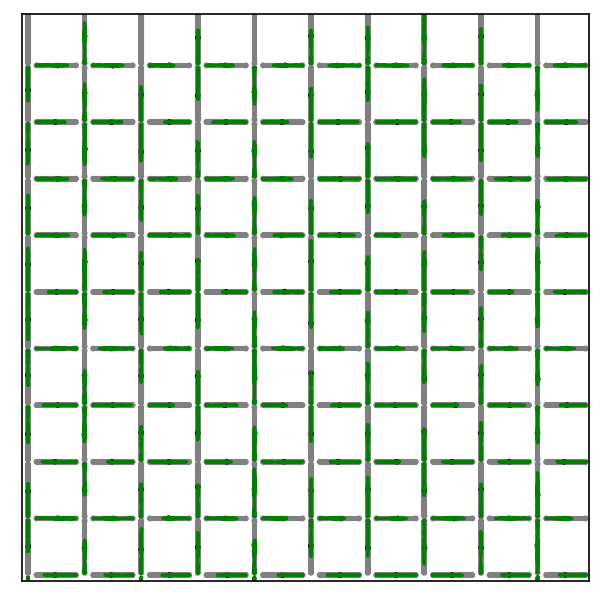

In [17]:
plt.figure(figsize=(5,5))

for i, trj_i in col_trj.groupby("id"):
    
    plt.plot(trj_i.x+trj_i.cx, trj_i.y+trj_i.cy, color = "green")
    
draw_frame(col_trj, region = bnd.iloc[0], radius = 1, trap_color="gray");

In [18]:
frames = trj.index.get_level_values("frame").unique()

v = ice.vertices()

In [19]:
v.vertices

,x,y
vertex,,


In [20]:
v.trj_to_vertices(col_trj.loc[frames[:]])

AttributeError: type object 'tqdm_notebook' has no attribute 'tqdm'